### Введение ###

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
import re
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

В нашем датасете представлены видео из раздела тренды платформы YouTube для 35 стран на момент крайнего запуска парсера - 14 мая 2023 года.

Список стран - Австралия, Австрия, Беларусь, Бельгия, Болгария, Канада, Хорватия, Чехия, Дания, Эстония, Финляндия, Франция, Грузия, Германия, Греция, Венгрия, Исландия, Ирландия, Италия, Латвия, Лихтенштейн, Литва, Молдова, Новая Зеландия, Норвегия, Польша, Португалия, Румыния, Сербия, Южная Корея, Испания, Швеция, Украина, Великобритания, Соединенные Штаты.

После парсинга наш датасет составлен из 6545 строк и 18 столбцов, после обработки - 6545 строк и 14 столбцов

###Часть 0 - Загрузка датасета, полученного на этапе парсинга ###
**Файл: dataset.csv**

In [ ]:
df = pd.read_csv('/content/dataset.csv', sep = ',', lineterminator='\n')
print(df.shape)
df.head()

(6545, 18)


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,subscriber_count
0,rVus1ZcMHYU,How the Warriors were in the Locker Room after...,2023-05-13T12:48:44Z,UC4G10tk3AHFuyMIuD3rHOBA,RDCworld1,17,23.14.05,[none],1733159,132947,0,5374,https://i.ytimg.com/vi/rVus1ZcMHYU/default.jpg,False,False,Another installment to the Warriors Locker Roo...,United States,6320000
1,Z4N8lzKNfy4,Lil Durk - All My Life ft. J. Cole (Official V...,2023-05-12T04:00:08Z,UCaxOQZrF5llUMp-JjesUz1A,Lil Durk,10,23.14.05,lil durk|lil durk music|lil durk music video|j...,5468946,360041,0,28291,https://i.ytimg.com/vi/Z4N8lzKNfy4/default.jpg,False,False,"Stream “All My Life” ft J. Cole, Out Now:https...",United States,5090000
2,jCPCsHGKoXw,FlightReacts To #6 WARRIORS at #7 LAKERS | FUL...,2023-05-13T06:20:56Z,UC_k0qgMNIW2VmTQKjFsbXDw,FlightReacts,24,23.14.05,Reactions|Family|vlog|life|NBA|sports|Friends|...,668981,37032,0,3496,https://i.ytimg.com/vi/jCPCsHGKoXw/default.jpg,False,False,Thanks for Tuning In!! Lets Get 5 Million Toge...,United States,4830000
3,F16odXHkjd8,GUESS THE MOM! *Emotional Mother's Day Reveal*,2023-05-13T14:00:07Z,UCKaCalz5N5ienIbfPzEbYuA,Jordan Matter,24,23.14.05,jordan matter|salish matter|say say matter|bre...,4225973,87240,0,11058,https://i.ytimg.com/vi/F16odXHkjd8/default.jpg,False,False,Today we reveal my wife for the first time EVE...,United States,15900000
4,HJJEfn0-idU,#6 WARRIORS at #7 LAKERS | FULL GAME 6 HIGHLIG...,2023-05-13T04:54:48Z,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,23.14.05,Basketball|G League|NBA|game-0042200236,4443119,47093,0,8094,https://i.ytimg.com/vi/HJJEfn0-idU/default.jpg,False,False,"Never miss a moment with the latest news, tren...",United States,20500000


### Часть 1 - Предварительное изучение и обработка данных ###

In [ ]:
df = df.drop(columns = ['dislikes', 'thumbnail_link', 'video_id', 'channelId'], axis=1) # удаление ненужных столбцов

In [ ]:
categories = {2: 'Autos & Vehicles', 1: 'Film & Animation', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 
              20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 
              28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 
              35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}

df['categoryId'] = df['categoryId'].apply(lambda x: categories[x]) # замена id на названия категорий
df = df.rename(columns = {'categoryId': 'category'})

In [ ]:
df['publishedAt'] = pd.to_datetime(pd.to_datetime(df['publishedAt']).dt.strftime('%Y-%m-%d %H:%M:%S')) # приведение даты к стандартному формату YYYY-MM-DD HH:MM:SS
df['trending_date'] = pd.to_datetime(pd.to_datetime(df['trending_date'], format='%y.%d.%m').dt.strftime('%Y-%m-%d')) # приведение даты к стандартному формату YYYY-MM-DD

#### Итоговый датасет выглядит следующим образом #####

In [ ]:
print(df.shape)
df.head()

(6545, 14)


,title,publishedAt,channelTitle,category,trending_date,tags,view_count,likes,comment_count,comments_disabled,ratings_disabled,description,country,subscriber_count
0,How the Warriors were in the Locker Room after...,2023-05-13 12:48:44,RDCworld1,Sports,2023-05-14,[none],1733159,132947,5374,False,False,Another installment to the Warriors Locker Roo...,United States,6320000
1,Lil Durk - All My Life ft. J. Cole (Official V...,2023-05-12 04:00:08,Lil Durk,Music,2023-05-14,lil durk|lil durk music|lil durk music video|j...,5468946,360041,28291,False,False,"Stream “All My Life” ft J. Cole, Out Now:https...",United States,5090000
2,FlightReacts To #6 WARRIORS at #7 LAKERS | FUL...,2023-05-13 06:20:56,FlightReacts,Entertainment,2023-05-14,Reactions|Family|vlog|life|NBA|sports|Friends|...,668981,37032,3496,False,False,Thanks for Tuning In!! Lets Get 5 Million Toge...,United States,4830000
3,GUESS THE MOM! *Emotional Mother's Day Reveal*,2023-05-13 14:00:07,Jordan Matter,Entertainment,2023-05-14,jordan matter|salish matter|say say matter|bre...,4225973,87240,11058,False,False,Today we reveal my wife for the first time EVE...,United States,15900000
4,#6 WARRIORS at #7 LAKERS | FULL GAME 6 HIGHLIG...,2023-05-13 04:54:48,NBA,Sports,2023-05-14,Basketball|G League|NBA|game-0042200236,4443119,47093,8094,False,False,"Never miss a moment with the latest news, tren...",United States,20500000


#### **Описание столбцов** ####


*   title - название видео
*   publishedAt - время публикации видео, принцип кодирования: "DAY TIME"
    *   DAY - календарный день выпуска видео в формате YYYY-MM-DD
    *   TIME - время в формате HH:MM:SS


*   channelTitle - название канала, на котором видео было опубликовано
*   category - категория видео

*   trending_date - дата, в которую видео попало в список трендов

*   tags - теги, прикрепленные автором к видео

*   view_count - количество просмотров
*   likes - количество лайков
*   comment_count - количество комментариев под видео
*   comments_disabled - отключены ли под видео комментарии
*   ratings_disabled - отключена ли возможность просматривать количество лайков под видео
* description - описание видео
* country - страна, в чьи тренды попало видео
* subscriber_count - количество подписчиков канала






Необходимо подготовить данные для дальнейшей работы. В первую очередь, посмотрим, есть ли пропуски в столбцах таблицы:

In [ ]:
df.isnull().sum()

title                  0
publishedAt            0
channelTitle           0
category               0
trending_date          0
tags                   0
view_count             0
likes                  0
comment_count          0
comments_disabled      0
ratings_disabled       0
description          926
country                0
subscriber_count       0
dtype: int64

Пропуски наблюдаются лишь в столбце **description** - это связано с тем, что не ко всем видео добавлено описание, поэтому заменяем пропуски в описании на пустую строку. \
В остальных столбцах пропуски отсутствуют.


In [ ]:
df['description'] = df['description'].fillna('') 

Получаем типы данных столбцов:

In [ ]:
df.dtypes

title                        object
publishedAt          datetime64[ns]
channelTitle                 object
category                     object
trending_date        datetime64[ns]
tags                         object
view_count                    int64
likes                         int64
comment_count                 int64
comments_disabled              bool
ratings_disabled               bool
description                  object
country                      object
subscriber_count              int64
dtype: object

### Часть 2 - Очистка данных ###

##### Методология удаления выбросов зависит от типа распределения данных в столбце. В нашей работе мы рассматриваем два варианта:


> Если распределение схоже с нормальным - определяем верхнюю и нижнюю границы по формуле: 

$$ [\text{mean} - 3 \cdot \text{std}; \text{mean} + 3 \cdot \text{std}] $$



> Если в распределении заметны отклонения в правую или левую сторону - используем метод Межквартильного расстояния (IQR):

$$ IQR = \text{75% quantile} - \text{25% quantile} $$

$$ [\text{first quartile} - 3 \cdot \text{IQR}; \text{third quartile} + 3 \cdot \text{IQR}]
 $$







##### Исследование столбца **view_count** #####

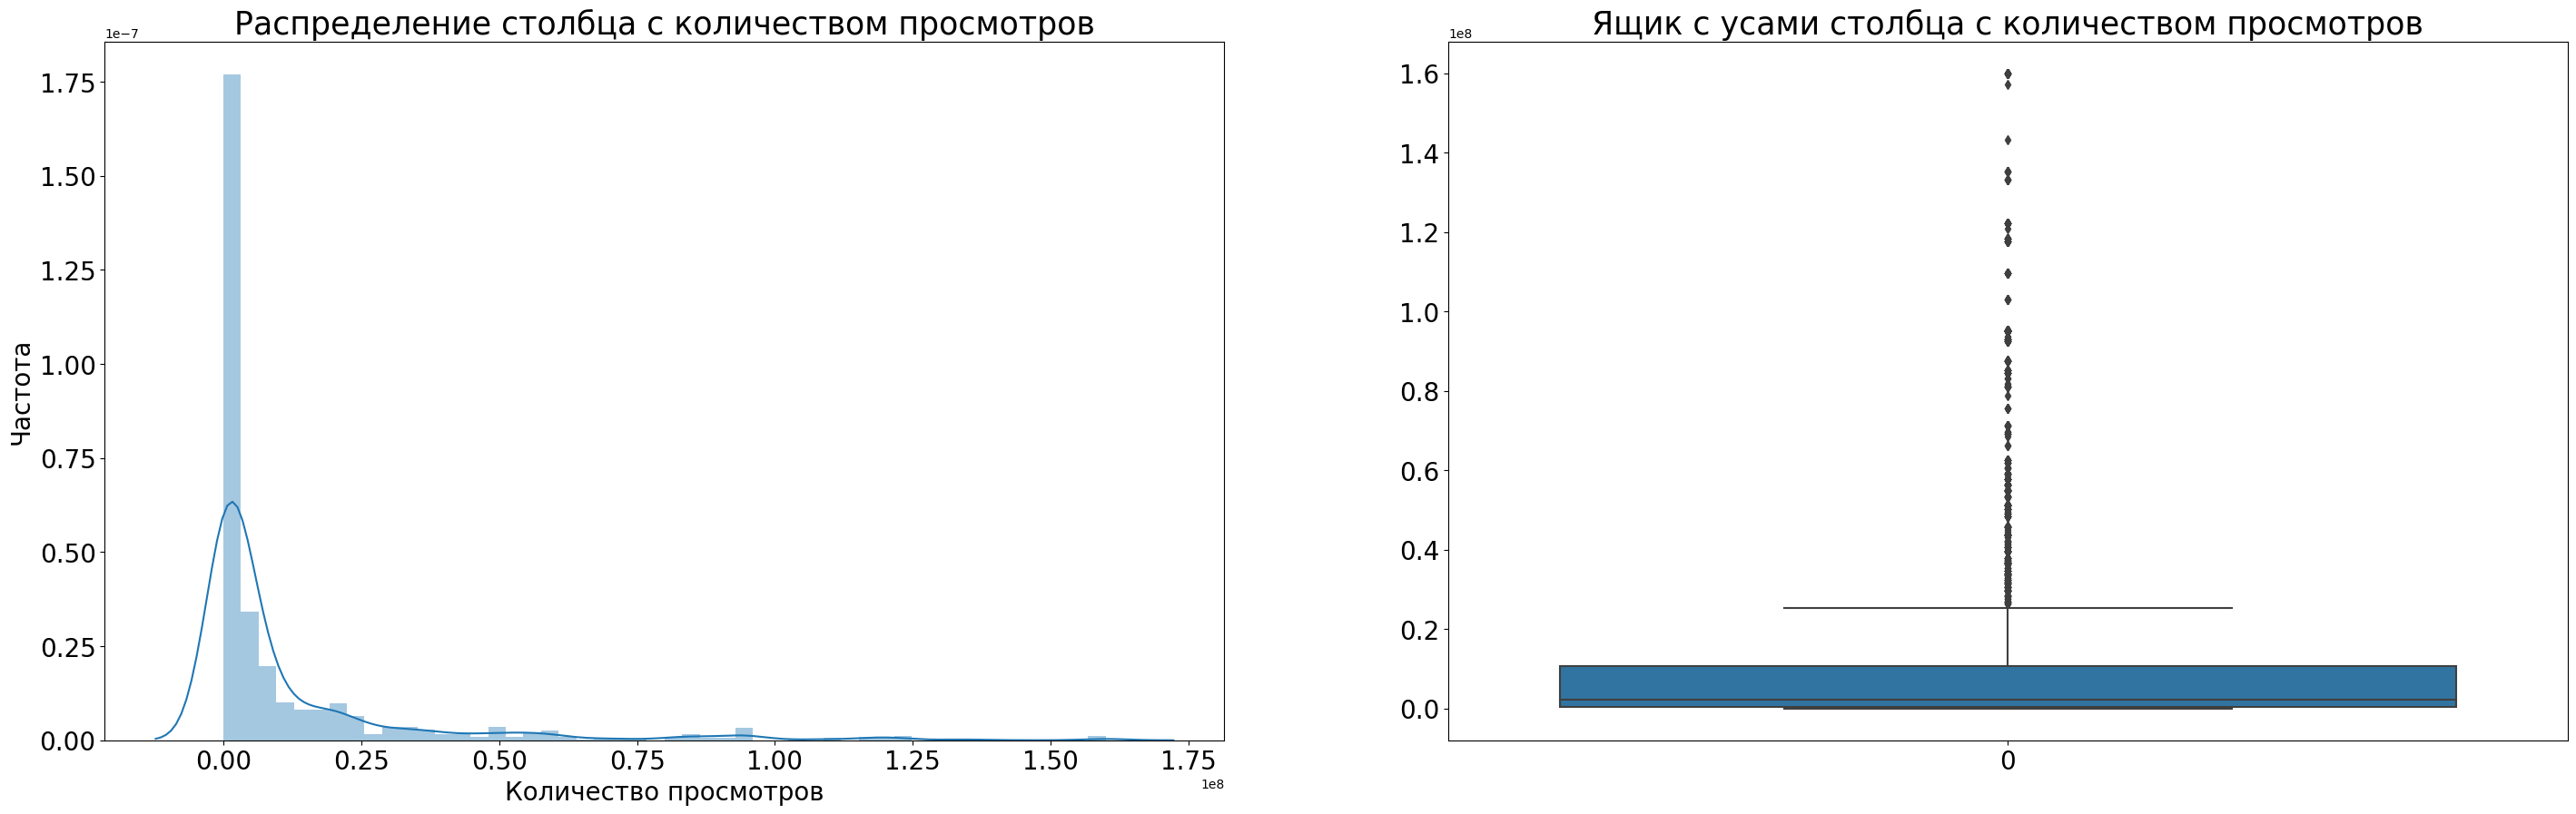

In [ ]:
plt.subplots(figsize=(35, 10)) 
plt.subplot(1, 2, 1)
sns.distplot(df['view_count'].dropna())
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.title('Распределение столбца с количеством просмотров', fontsize = 25)
plt.xlabel("Количество просмотров", fontsize = 20)
plt.ylabel("Частота", fontsize = 20)

plt.subplot(1, 2, 2)
sns.boxplot(df['view_count'])
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.title('Ящик с усами столбца с количеством просмотров', fontsize = 25);

Можно заметить, что данные перекошены в левую сторону, используем метод межквартильного расстояния

In [ ]:
q75, q25 = np.percentile(df['view_count'], [75 ,25])
IQR = q75 - q25
lower_bound = df['view_count'].quantile(0.25) - 3 * IQR
upper_bound = df['view_count'].quantile(0.75) + 3 * IQR

df = df[(df['view_count'] >= lower_bound) & (df['view_count'] <= upper_bound)]

##### Исследование столбца **likes** #####

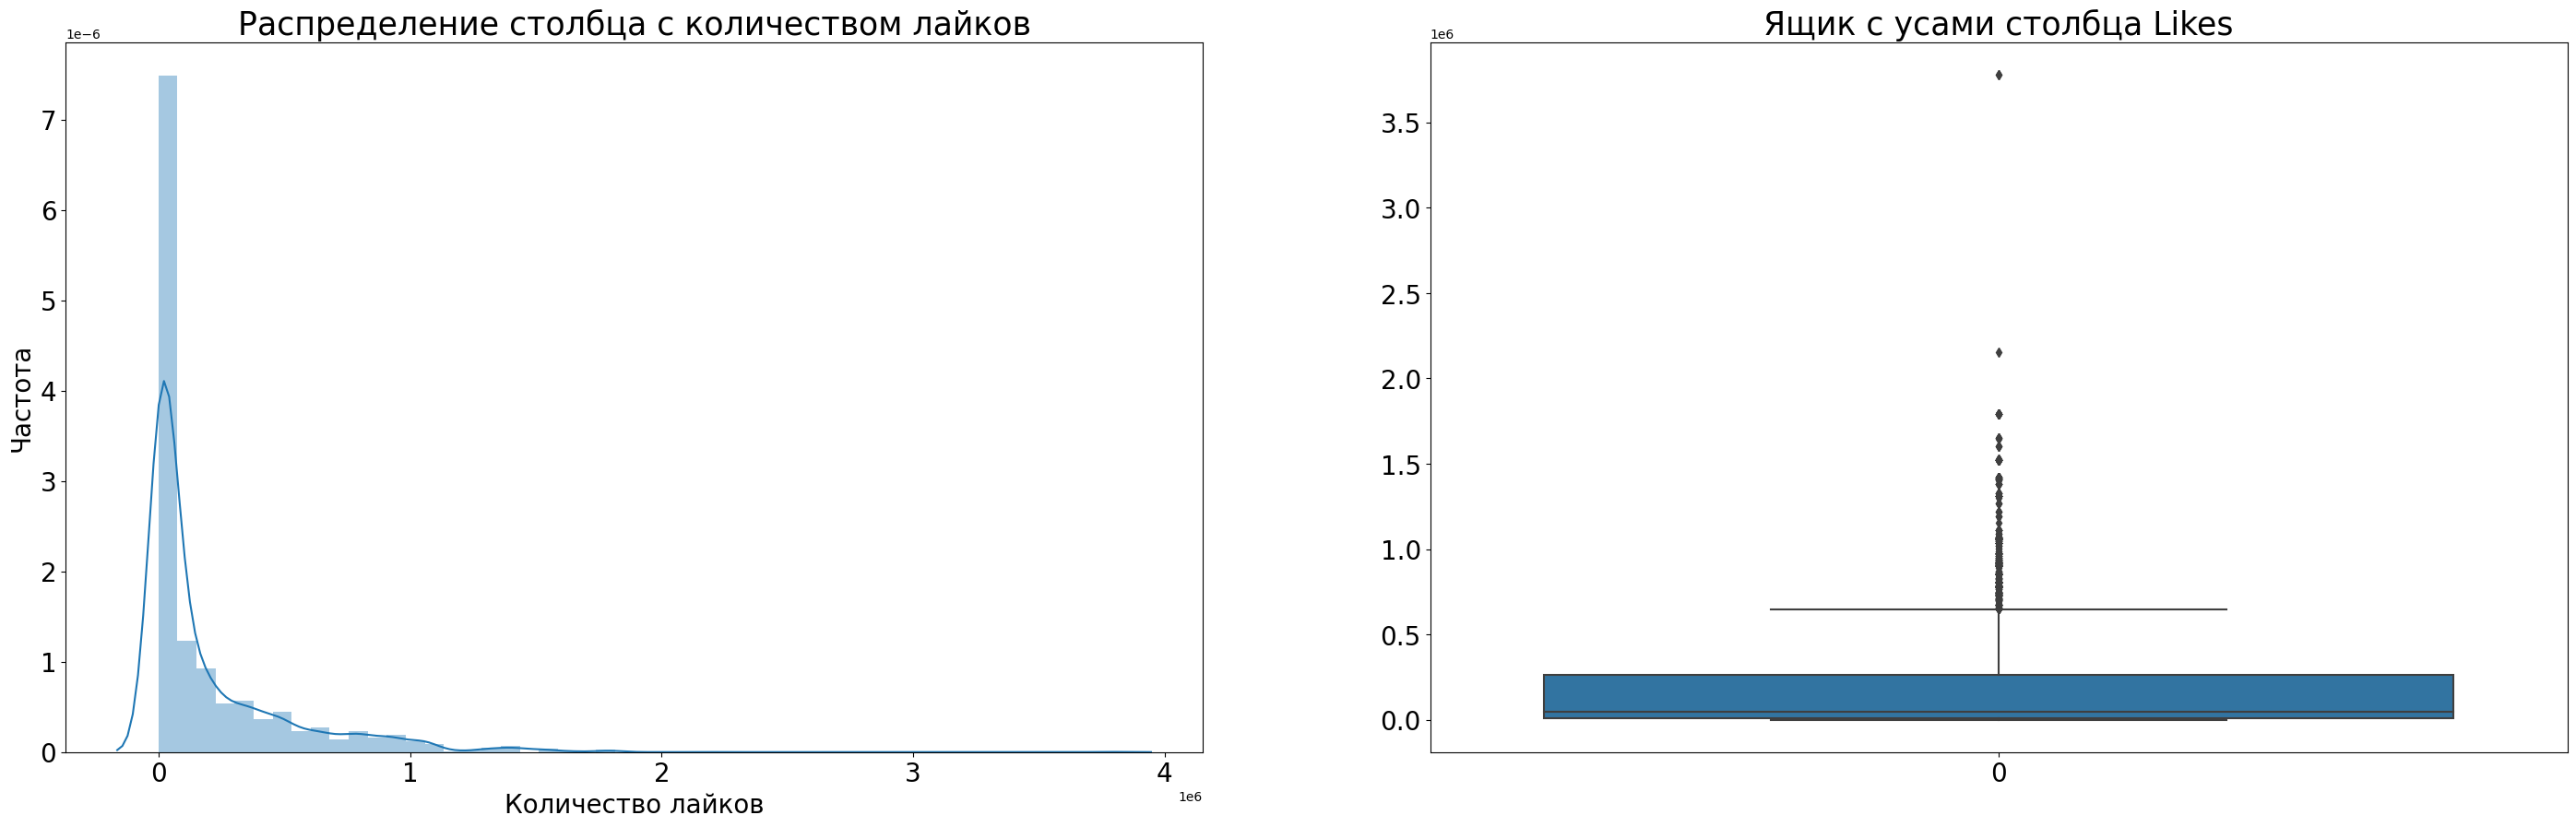

In [ ]:
plt.subplots(figsize=(35, 10)) 
plt.subplot(1, 2, 1)
sns.distplot(df['likes'].dropna())
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.title('Распределение столбца с количеством лайков', fontsize = 25)
plt.xlabel("Количество лайков", fontsize = 20)
plt.ylabel("Частота", fontsize = 20)

plt.subplot(1, 2, 2)
sns.boxplot(df['likes'])
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.title('Ящик с усами столбца Likes', fontsize = 25);

Можно заметить, что данные перекошены в левую сторону, используем метод межквартильного расстояния

In [ ]:
q75, q25 = np.percentile(df['likes'], [75 ,25])
IQR = q75 - q25
lower_bound = df['likes'].quantile(0.25) - 3 * IQR
upper_bound = df['likes'].quantile(0.75) + 3 * IQR

df = df[(df['likes'] >= lower_bound) & (df['likes'] <= upper_bound)]

##### Исследование столбца **comment_count** #####

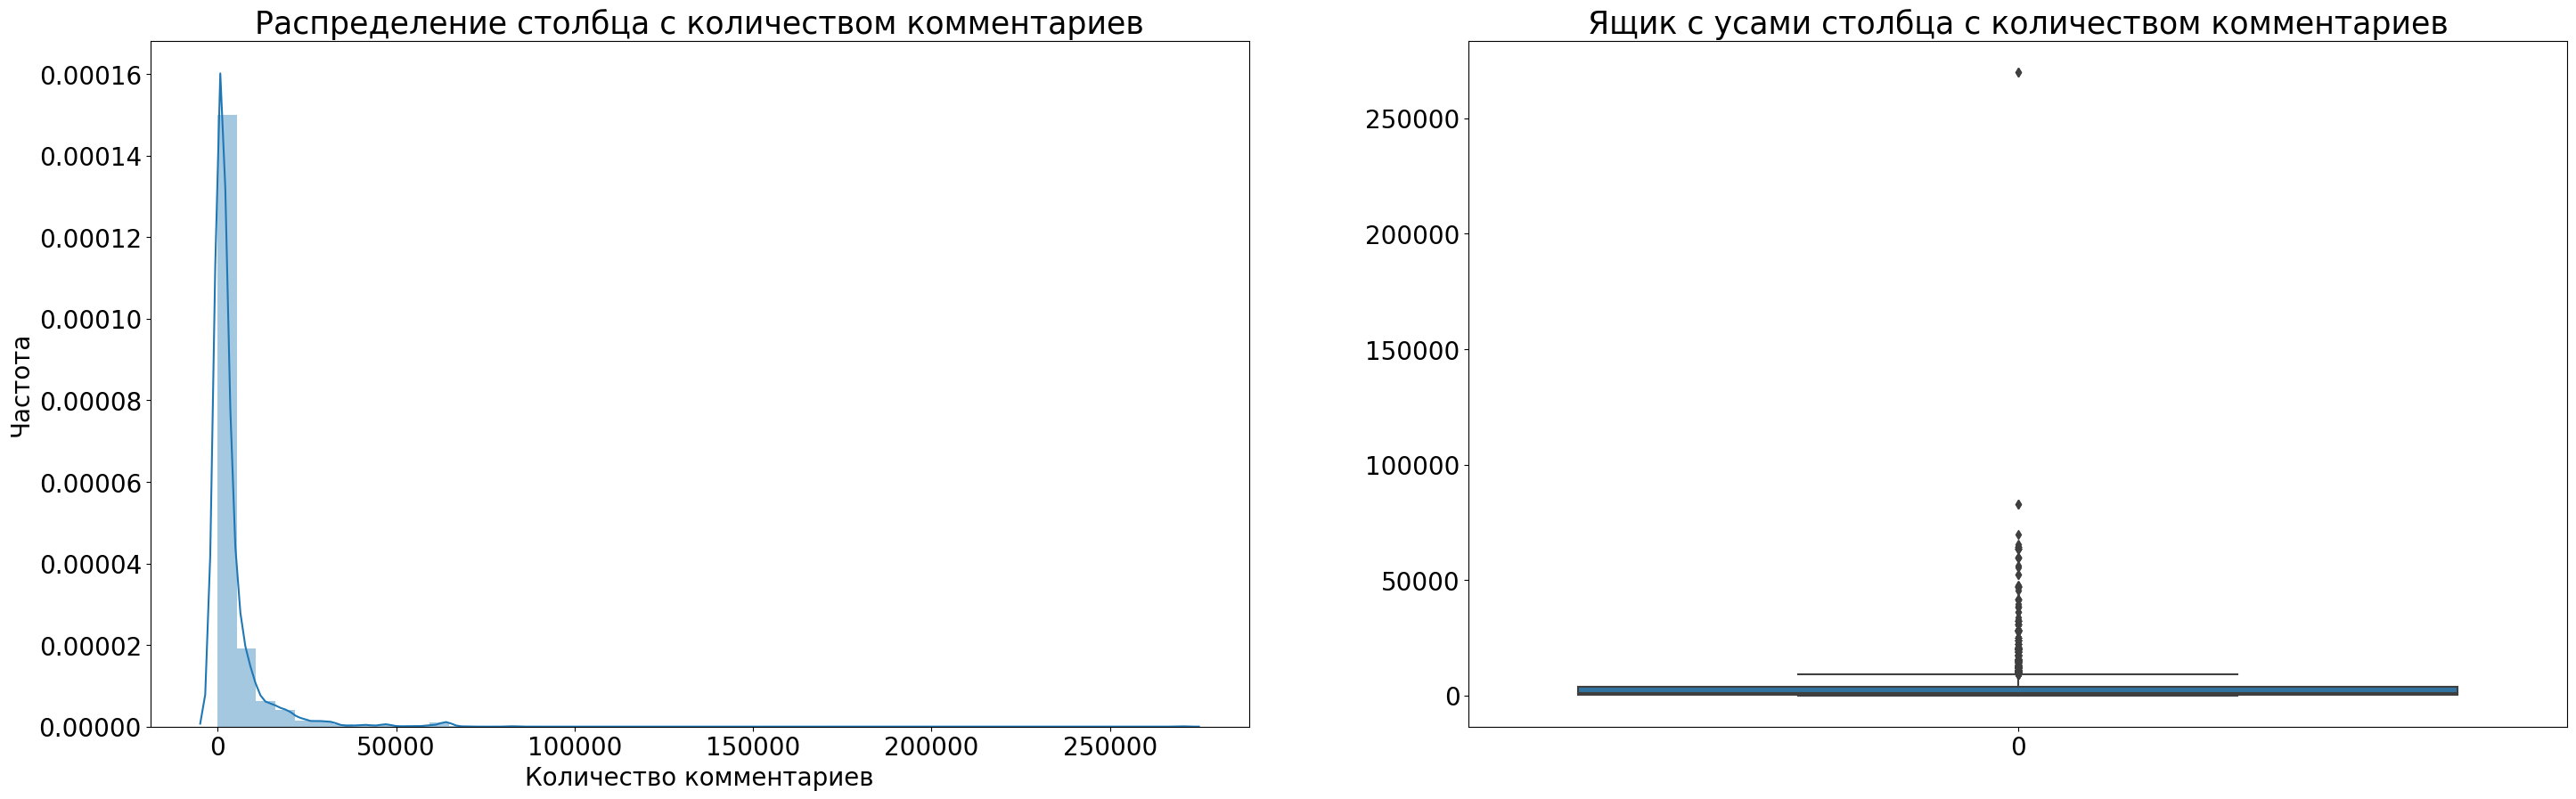

In [ ]:
plt.subplots(figsize=(35, 10)) 
plt.subplot(1, 2, 1)
sns.distplot(df['comment_count'].dropna())
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.title('Распределение столбца с количеством комментариев', fontsize = 25)
plt.xlabel("Количество комментариев", fontsize = 20)
plt.ylabel("Частота", fontsize = 20)

plt.subplot(1, 2, 2)
sns.boxplot(df['comment_count'])
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.title('Ящик с усами столбца с количеством комментариев', fontsize = 25);

Можно заметить, что данные перекошены в левую сторону, используем метод межквартильного расстояния

In [ ]:
q75, q25 = np.percentile(df['comment_count'], [75 ,25])
IQR = q75 - q25
lower_bound = df['comment_count'].quantile(0.25) - 3 * IQR
upper_bound = df['comment_count'].quantile(0.75) + 3 * IQR

df = df[(df['comment_count'] >= lower_bound) & (df['comment_count'] <= upper_bound)]

##### Исследование столбца **subscriber_count** #####

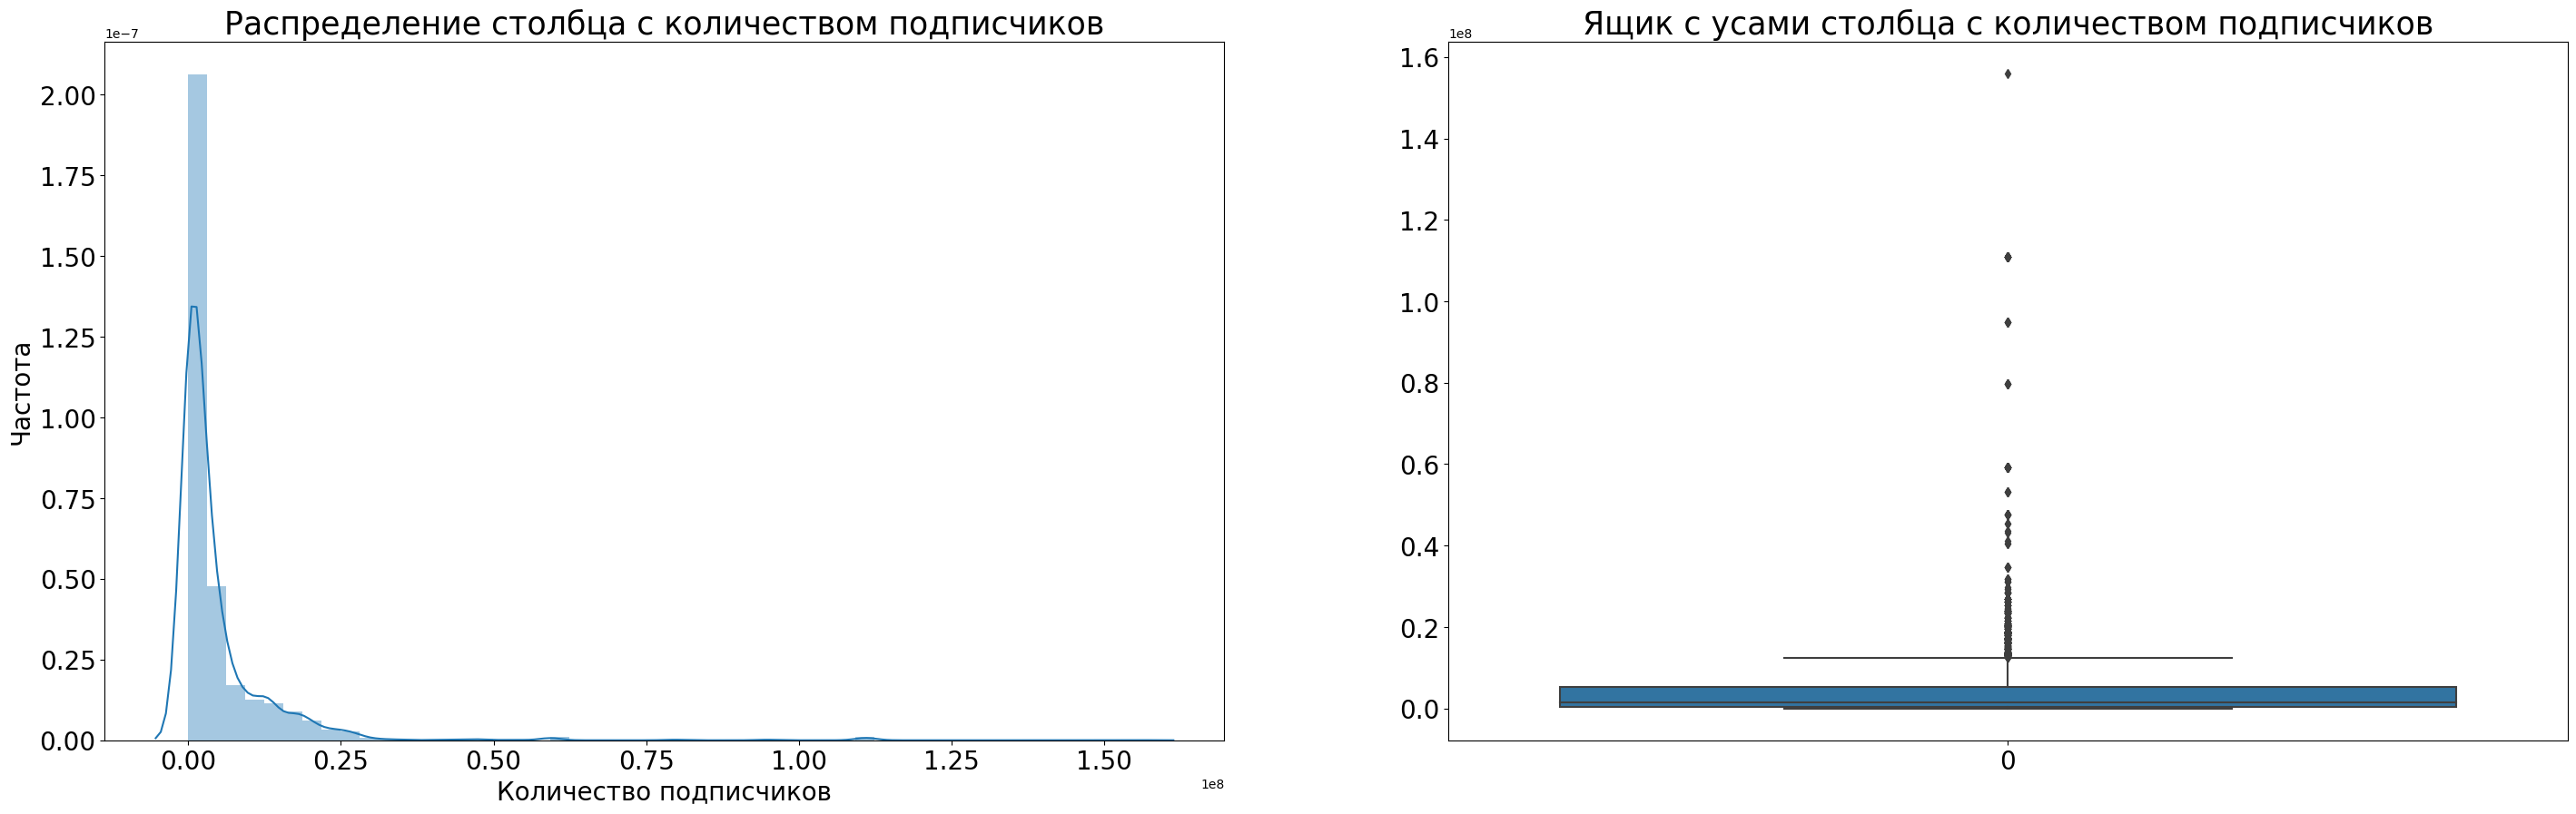

In [ ]:
plt.subplots(figsize=(35, 10)) 
plt.subplot(1, 2, 1)
sns.distplot(df['subscriber_count'].dropna())
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.title('Распределение столбца с количеством подписчиков', fontsize = 25)
plt.xlabel("Количество подписчиков", fontsize = 20)
plt.ylabel("Частота", fontsize = 20)

plt.subplot(1, 2, 2)
sns.boxplot(df['subscriber_count'])
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.title('Ящик с усами столбца с количеством подписчиков', fontsize = 25);

Можно заметить, что данные перекошены в левую сторону, используем метод межквартильного расстояния

In [ ]:
q75, q25 = np.percentile(df['subscriber_count'], [75 ,25])
IQR = q75 - q25
lower_bound = df['subscriber_count'].quantile(0.25) - 3 * IQR
upper_bound = df['subscriber_count'].quantile(0.75) + 3 * IQR

df = df[(df['subscriber_count'] >= lower_bound) & (df['subscriber_count'] <= upper_bound)]

### Часть 3 - Поиск и анализ взаимосвязей ###

#### Этап 1 - Базовый корреляционный анализ ####

Построим корреляционную матрицу, чтобы сделать вывод о линейной взаимосвязи между рассматриваемыми числовыми переменными:

In [ ]:
df.corr()

,view_count,likes,comment_count,comments_disabled,ratings_disabled,subscriber_count
view_count,1.000000,0.826590,0.144722,0.060209,0.079925,0.355930
likes,0.826590,1.000000,0.276624,0.002831,-0.072953,0.387759
comment_count,0.144722,0.276624,1.000000,-0.111967,-0.026970,0.353644
comments_disabled,0.060209,0.002831,-0.111967,1.000000,0.043909,0.022322
ratings_disabled,0.079925,-0.072953,-0.026970,0.043909,1.000000,0.028329
subscriber_count,0.355930,0.387759,0.353644,0.022322,0.028329,1.000000


<Axes: >

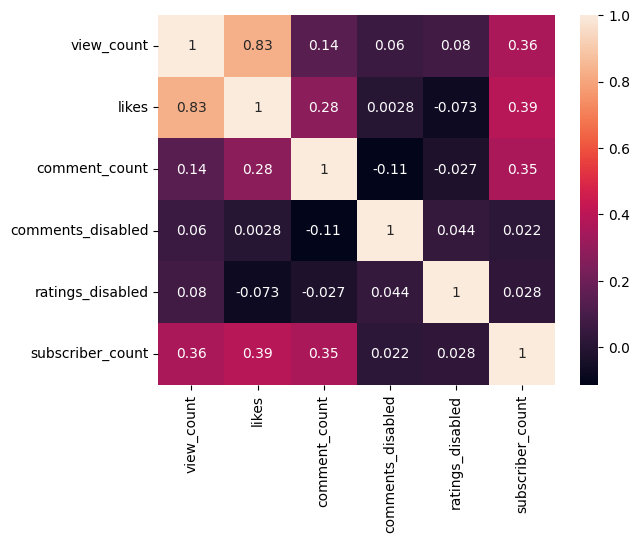

In [129]:
sns.heatmap(df.corr(), annot = True)

Построим диаграммы рассеяния для уникальных пар числовых переменных. Корреляцию переменной с самой собой не рассматриваем

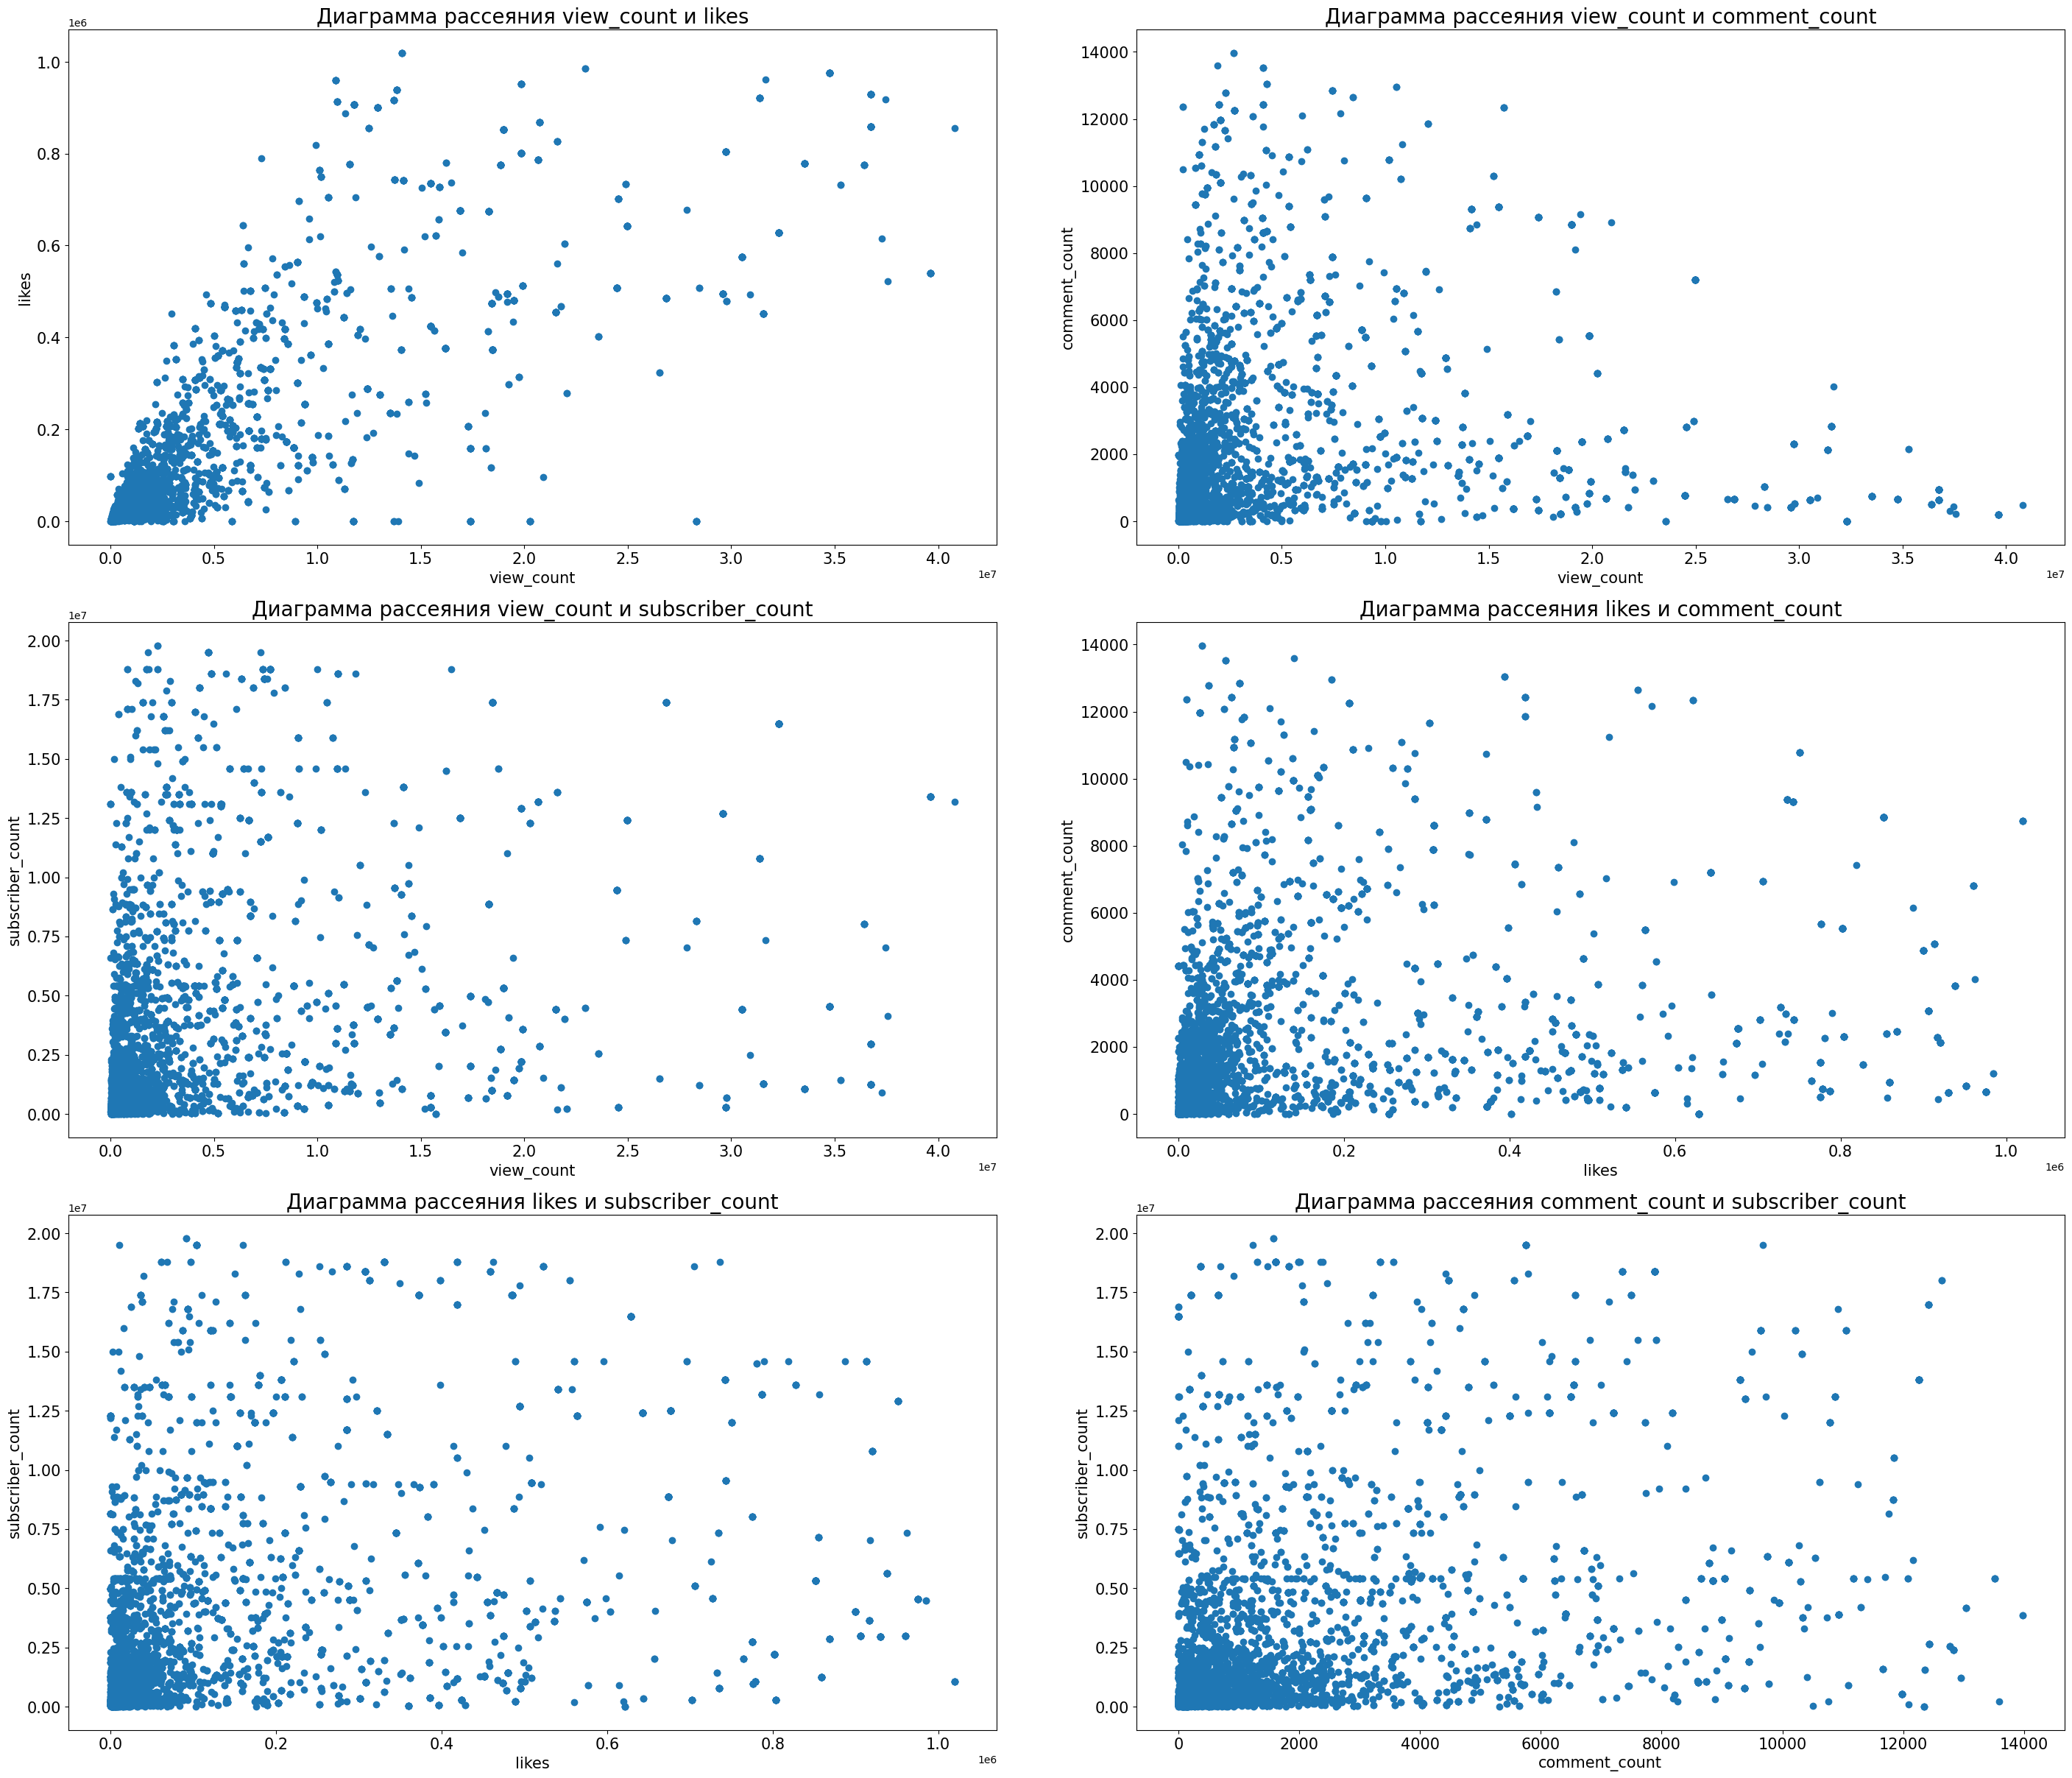

In [ ]:
column_names = ['view_count', 'likes', 'comment_count', 'subscriber_count']
pairs = list(combinations(column_names, 2)) # создание уникальных пар числовых переменных - 6 пар

plt.subplots(figsize=(35, 30)) 
for i in range(6):
  name1, name2 = pairs[i]
  plt.subplot(3, 2, i + 1) 
  plt.scatter(df[name1], df[name2])
  plt.tick_params(axis='both', which='major', labelsize = 15)
  plt.title(f'Диаграмма рассеяния {name1} и {name2}', fontsize = 20)
  plt.xlabel(name1, fontsize = 15)
  plt.ylabel(name2, fontsize = 15)

plt.subplots_adjust(wspace=0.15, hspace=0.15)

#### Детально рассмотрим каждую из пар и проинтерпретируем полученные реультаты: #####
Об оценке силы корреляционной связи будем судить исходя из таблицы Чеддока:
*   Пара **view_count - likes** : наблюдаем положительную сильную линейную взаимосвязь между переменными (коэффициент корреляции = **0.83**). Предварительно можем сделать вывод о том, что при увеличении количества просмотров количество лайков также будет увеличиваться;
*   Пара **view_count - comment_count** : наблюдаем положительную слабую линейную взаимосвязь между переменными (коэффициент корреляции = **0.14**). На данном этапе можем сделать вывод о том, что изменение количества просмотров не будет совсем (или почти совсем) влиять на изменение количества комментариев (и наоборот);
*   Пара **view_count - subscriber_count** : наблюдаем положительную умеренную линейную взаимосвязь между переменными (коэффициент корреляции = **0.36**). Предположим на этом этапе анализа, что при увеличении числа просмотров количество подписчиков будет увеличиваться (и наоборот), но не так ярко выраженно, как при сильной корреляции;
*   Пара **likes - comment_count** : наблюдаем положительную слабую линейную взаимосвязь между переменными (коэффициент корреляции = **0.28**). Можем сказать, что изменение количества просмотров не будет совсем (или почти совсем) влиять на изменение количества комментариев (и наоборот);
*   Пара **likes - subscriber_count** : наблюдаем положительную умеренную линейную взаимосвязь между переменными (коэффициент корреляции = **0.39**). При увеличении количества лайков количество подписчиков также будет увеличиваться (и наоборот), но в меньшей степени, чем при сильной взаимозависимости;
*   Пара **comment_count - subscriber_count** : наблюдаем положительную умеренную линейную взаимосвязь между переменными (коэффициент корреляции = **0.35**). При увеличении количества комментариев количество подписчиков также будет увеличиваться (и наоборот), но не так интенсивно, как при сильной взаимозависимости;


#### Этап 2 - поиск взаимосвязей путем визуализации ####
На данном этапе мы ищем ваимосвязи между переменными с помощью построения графиков

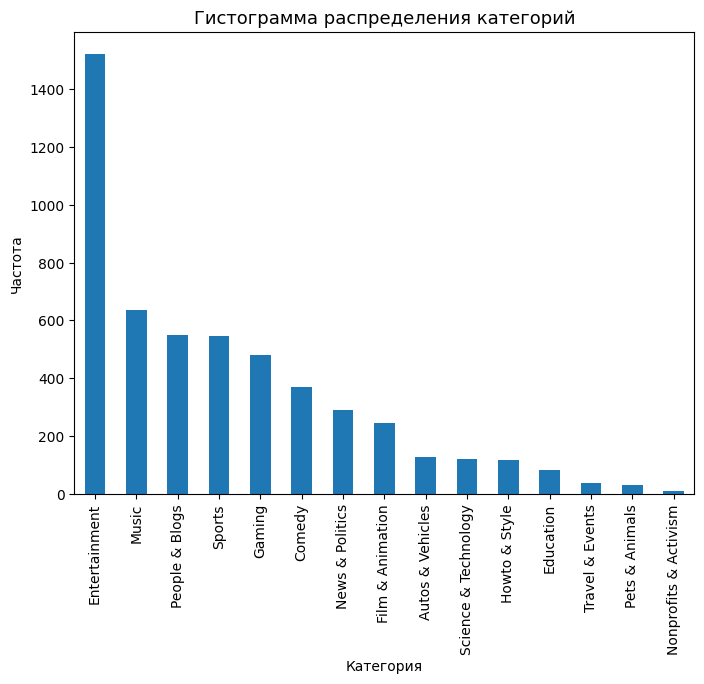

In [ ]:
plt.subplots(figsize=(8, 6)) 
df['category'].value_counts().plot(kind='bar')
plt.title('Гистограмма распределения категорий', fontsize = 13)
plt.xlabel('Категория', fontsize = 10)
plt.ylabel('Частота', fontsize = 10);

**Вывод:** \
Можем заметить, что чаще всего во вкладке "Тренды" можно встретить видео из категории **"Entertainment"**, причем чаще более, чем в 2 раза, чем видео из следующей по популярности категории "Music"; реже всего - видео из категории **"Nonprofits & Activism"**

Посмотрим, как между собой связаны час публикации видео и количество видео, попавших в "Тренды"

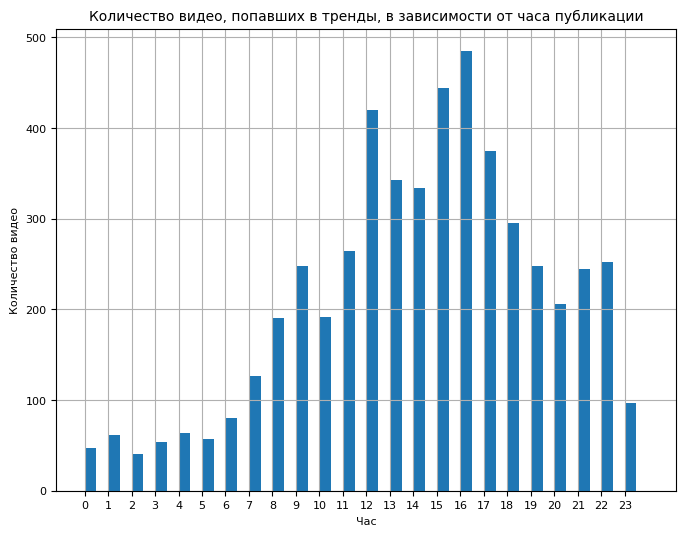

In [ ]:
plt.subplots(figsize=(8, 6)) 
df['publishedAt'].dt.hour.hist(bins = range(0, 25), width = 0.5)
plt.tick_params(axis='both', which='major', labelsize = 8)
plt.xticks(range(24))
plt.title('Количество видео, попавших в тренды, в зависимости от часа публикации', fontsize = 10)
plt.xlabel('Час', fontsize = 8)
plt.ylabel('Количество видео', fontsize = 8);

**Вывод:** \
Заметим, что почти в 50% случаев во вкладку "Тренды" попадают видео, опубликованные около 16 часов дня. Более того, отметим, что чаще всего видео, опубликованные днем (с 12 до 17 часов), попадают в "Тренды". Реже всего в этой вкладке появляются видео, выложенные ночью: так, видео, опубликованные около 2 часов ночи, реже всех появляются в "Трендах". Предположим, что это связано с тем, что пользователи (блогеры) наиболее активно используют YouTube днем, наименее активно - ночью.

Посмотрим, как между собой связаны час публикации видео и количество просмотров на видео

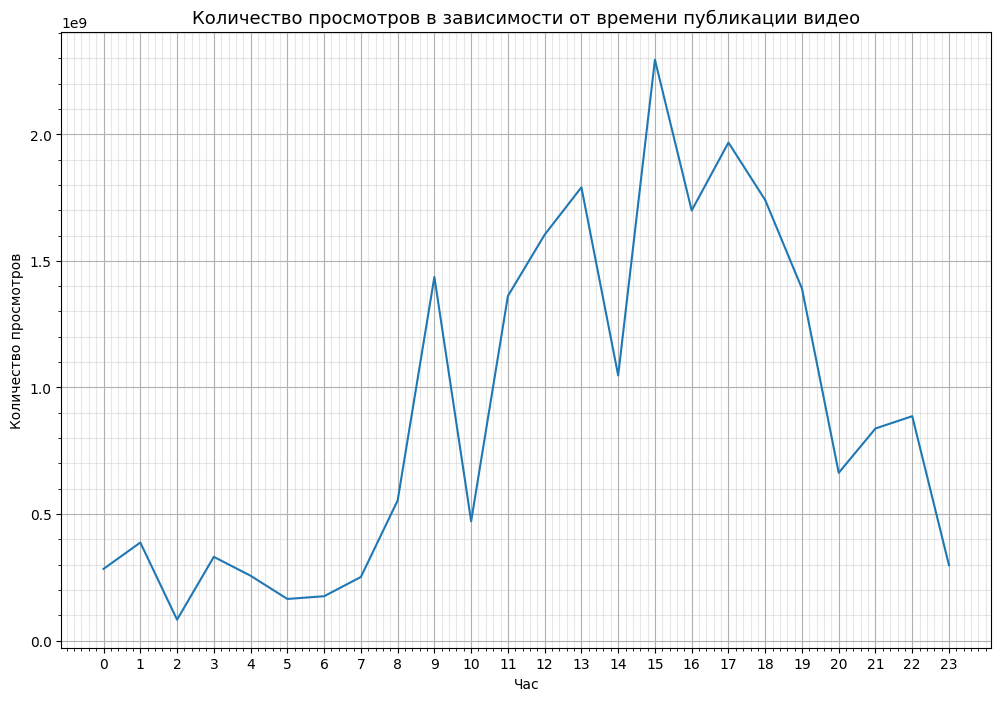

In [ ]:
df['hoursPub'] = df['publishedAt'].dt.hour # временно добавляем в таблицу новый признак - час публикации видео, это необходимо для группировки
temp = df.groupby(['hoursPub']).agg({'view_count': 'sum'})

fig, ax = plt.subplots(figsize=(12, 8)) 
ax.grid(which='both') # настройка более подробной сетки: увеличение частоты делений
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=0.3)
ax.grid(which='major', alpha=1)
ax.set_xticks(range(24))

plt.plot(temp['view_count'])
plt.title('Количество просмотров в зависимости от времени публикации видео', fontsize = 13)
plt.xlabel('Час', fontsize = 10)
plt.ylabel('Количество просмотров', fontsize = 10);

df = df.drop('hoursPub', axis = 1) # удаление временного параметра

**Вывод:** \
Аналогично предыдущему пункту: днем пользователи наиболее часто просматривают видео, ночью - реже всего: около 15 часов дня зрители наиболее активны, около 2 часов ночи - наименее активны. Интересно, что после 9 утра количество просмотров резко снижается, а после 10 утра - увеличивается. Можно предположить, что резкое снижение активности связано с началом рабочего дня у пользователей.

Посмотрим, как между собой связаны категории видео и количество лайков, комментариев, просмотров и подписчиков

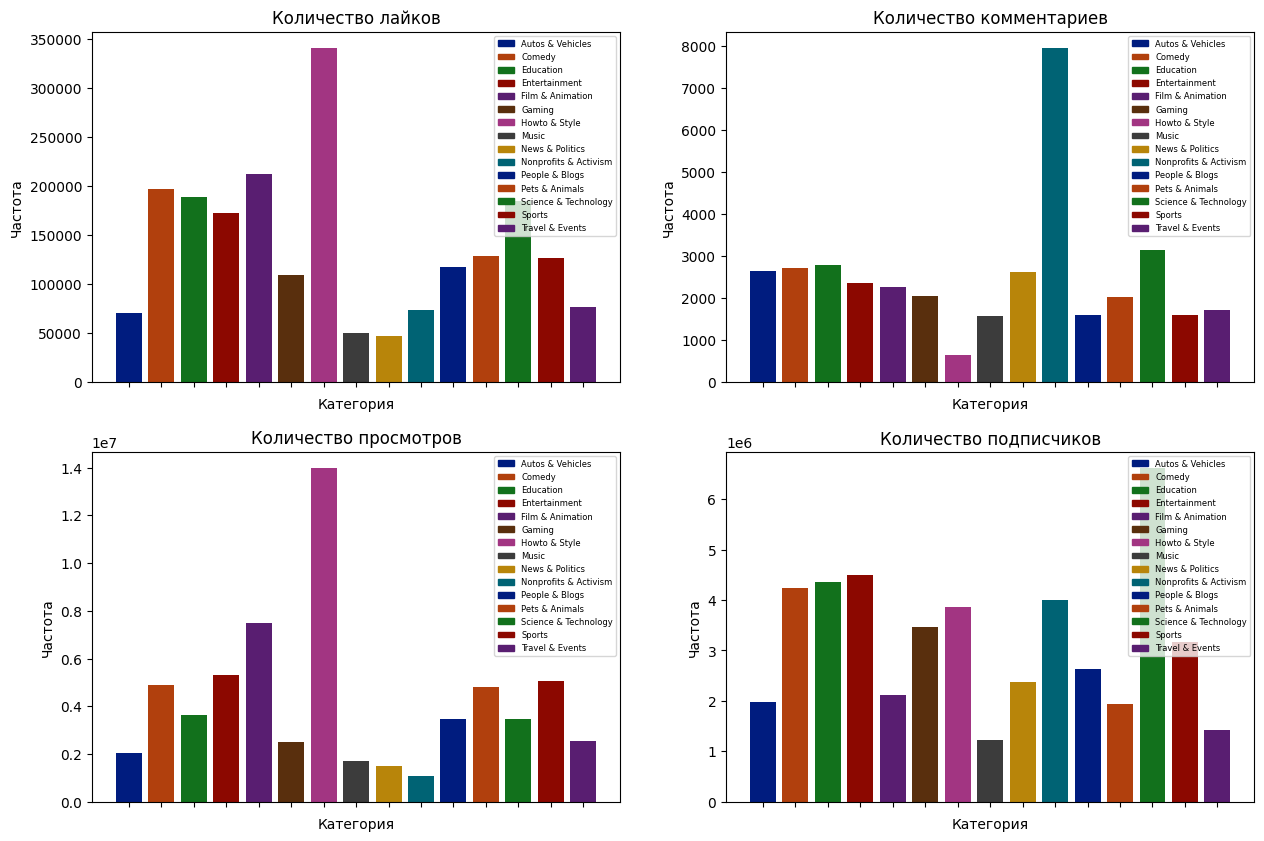

In [ ]:
tempLikes = df.groupby(['category']).agg({'likes': 'mean'})
tempComment = df.groupby(['category']).agg({'comment_count': 'mean'})
tempViews = df.groupby(['category']).agg({'view_count': 'mean'})
tempSubscribers = df.groupby(['category']).agg({'subscriber_count': 'mean'})
tempList = [tempLikes, tempComment, tempViews, tempSubscribers]

x = tempLikes.index
colors = sns.color_palette('dark', 15)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].bar(x, tempLikes['likes'], color = colors)
axes[0, 0].set_title('Количество лайков')
axes[0, 0].set_xticklabels([])
patches = [mpatches.Patch(color=colors[i], label=x[i]) for i in range(len(x))]
axes[0, 0].legend(handles=patches, prop={'size': 6}, loc='upper right')
axes[0, 0].set_xlabel('Категория', fontsize = 10)
axes[0, 0].set_ylabel('Частота', fontsize = 10)


axes[0, 1].bar(x, tempComment['comment_count'], color = colors)
axes[0, 1].set_title('Количество комментариев')
axes[0, 1].set_xticklabels([])
patches = [mpatches.Patch(color=colors[i], label=x[i]) for i in range(len(x))]
axes[0, 1].legend(handles=patches, prop={'size': 6}, loc='upper right')
axes[0, 1].set_xlabel('Категория', fontsize = 10)
axes[0, 1].set_ylabel('Частота', fontsize = 10)

axes[1, 0].bar(x, tempViews['view_count'], color = colors)
axes[1, 0].set_title('Количество просмотров')
axes[1, 0].set_xticklabels([])
patches = [mpatches.Patch(color=colors[i], label=x[i]) for i in range(len(x))]
axes[1, 0].legend(handles=patches, prop={'size': 6}, loc='upper right')
axes[1, 0].set_xlabel('Категория', fontsize = 10)
axes[1, 0].set_ylabel('Частота', fontsize = 10)


axes[1, 1].bar(x, tempSubscribers['subscriber_count'], color = colors)
axes[1, 1].set_title('Количество подписчиков')
axes[1, 1].set_xticklabels([])
patches = [mpatches.Patch(color=colors[i], label=x[i]) for i in range(len(x))]
axes[1, 1].legend(handles=patches, prop={'size': 6}, loc='upper right')
axes[1, 1].set_xlabel('Категория', fontsize = 10)
axes[1, 1].set_ylabel('Частота', fontsize = 10);

**Выводы:** 


*   График **"Количество лайков"** : наиболее часто лайки ставят видео из категории "Howto & style", наименее часто - "News & Politics"

*   График **"Количество комментариев"** : наиболее часто пользователи оставляют комментарии под видео категории "Nonprofits & Activism", наименее часто - "Howto & style"

*   График **"Количество просмотров"** : наиболее часто пользователи просматривают видео категории "Howto & style", наименее часто - "Nonprofits & Activism"
*   График **"Количество подписчиков"** : наибольшее количество подписчиков у блогеров, публикующих видео категории "Science & Technology", наименьшее -  у "Music".



Посмотрим, как между собой связаны страна и количество лайков, комментариев, просмотров и подписчиков

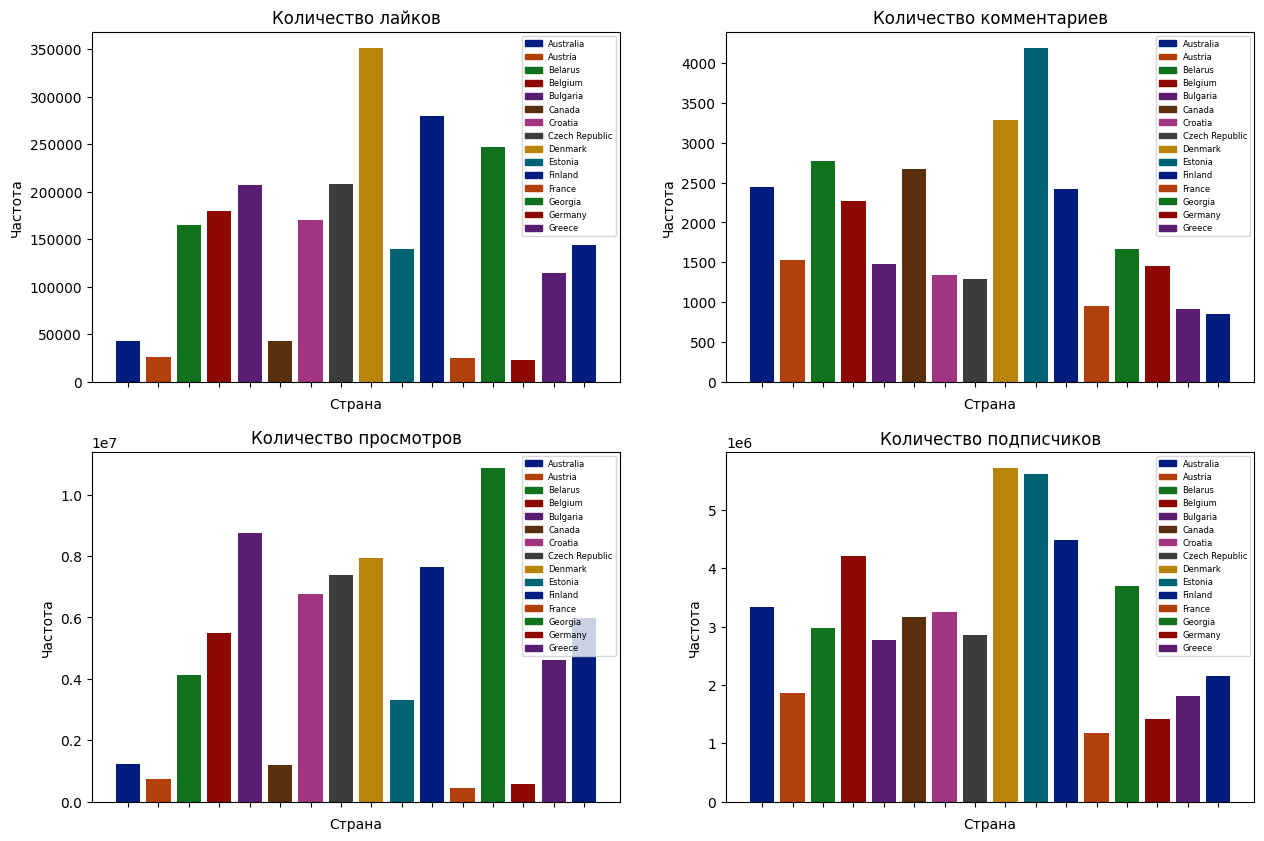

In [ ]:
tempLikes = df.groupby(['country']).agg({'likes': 'mean'})
tempComment = df.groupby(['country']).agg({'comment_count': 'mean'})
tempViews = df.groupby(['country']).agg({'view_count': 'mean'})
tempSubscribers = df.groupby(['country']).agg({'subscriber_count': 'mean'})
tempList = [tempLikes, tempComment, tempViews, tempSubscribers]

x = tempLikes.index[:16]
colors = sns.color_palette('dark', 15)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].bar(x, tempLikes[:16]['likes'], color = colors)
axes[0, 0].set_title('Количество лайков')
axes[0, 0].set_xticklabels([])
patches = [mpatches.Patch(color=colors[i], label=x[i]) for i in range(15)]
axes[0, 0].legend(handles=patches, prop={'size': 6}, loc='upper right')
axes[0, 0].set_xlabel('Страна', fontsize = 10)
axes[0, 0].set_ylabel('Частота', fontsize = 10)


axes[0, 1].bar(x, tempComment[:16]['comment_count'], color = colors)
axes[0, 1].set_title('Количество комментариев')
axes[0, 1].set_xticklabels([])
patches = [mpatches.Patch(color=colors[i], label=x[i]) for i in range(15)]
axes[0, 1].legend(handles=patches, prop={'size': 6}, loc='upper right')
axes[0, 1].set_xlabel('Страна', fontsize = 10)
axes[0, 1].set_ylabel('Частота', fontsize = 10)

axes[1, 0].bar(x, tempViews[:16]['view_count'], color = colors)
axes[1, 0].set_title('Количество просмотров')
axes[1, 0].set_xticklabels([])
patches = [mpatches.Patch(color=colors[i], label=x[i]) for i in range(15)]
axes[1, 0].legend(handles=patches, prop={'size': 6}, loc='upper right')
axes[1, 0].set_xlabel('Страна', fontsize = 10)
axes[1, 0].set_ylabel('Частота', fontsize = 10)


axes[1, 1].bar(x, tempSubscribers[:16]['subscriber_count'], color = colors)
axes[1, 1].set_title('Количество подписчиков')
axes[1, 1].set_xticklabels([])
patches = [mpatches.Patch(color=colors[i], label=x[i]) for i in range(15)]
axes[1, 1].legend(handles=patches, prop={'size': 6}, loc='upper right')
axes[1, 1].set_xlabel('Страна', fontsize = 10)
axes[1, 1].set_ylabel('Частота', fontsize = 10);

**Выводы:** 

*   График **"Количество лайков"** : большинство лайков приходится на видео в "Трендах" Дании, меньшинство - на видео в Австрии, Франции и Германии

*   График **"Количество комментариев"** : большинство комментариев приходится на видео в "Трендах" Эстонии, меньшинство - на видео во Франции

*   График **"Количество просмотров"** : большинство просмотров приходится на видео в "Трендах" Грузии, меньшинство - на видео во Франции и Германии
*   График **"Количество подписчиков"** : большинство подписчиков приходится на видео блогеров в "Трендах" Дании, меньшинство - на видео во Франции.

Рассмотрим влияние отключения комментариев на количество лайков под видео

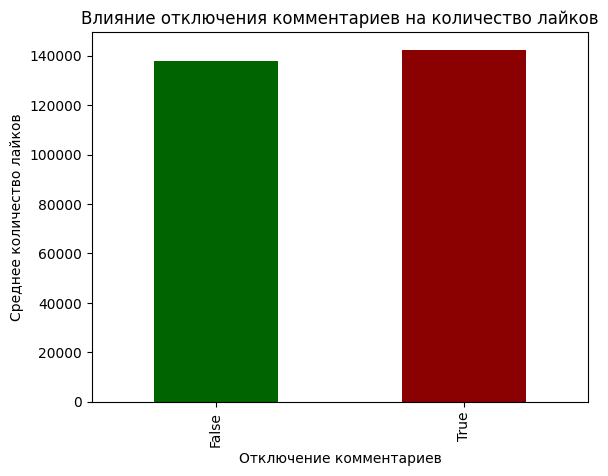

In [ ]:
disabled_comm = df.groupby('comments_disabled')['likes'].mean()
disabled_comm.plot(kind = 'bar', color = sns.color_palette(['darkgreen', 'darkred']))
plt.xlabel('Отключение комментариев')
plt.ylabel('Среднее количество лайков')
plt.title('Влияние отключения комментариев на количество лайков');

**Вывод:** \
В среднем, количество лайков под видео в "Трендах" с отключенными комментариями и неотключенными - одинаковы. Можем сказать, что отключение комментариев не влияет на то, сколько лайков собирает видео.

Рассмотрим, как количество слов связано с попаданием видео в "Тренды"

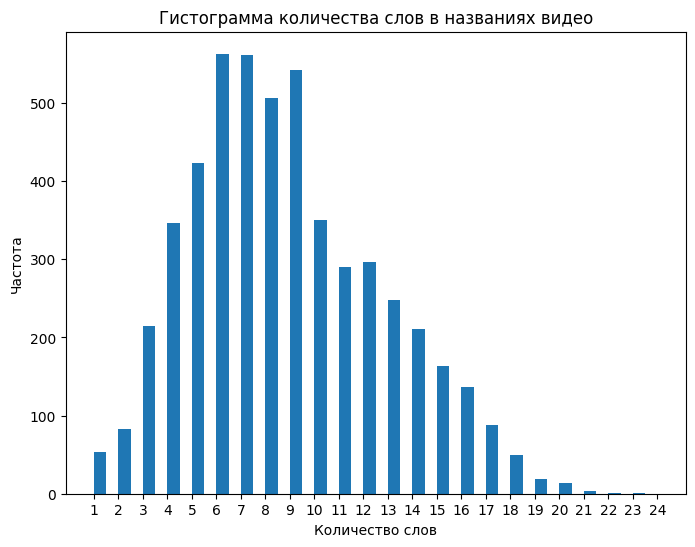

In [ ]:
title_len = df['title'].apply(lambda x: len(x.split()))

plt.subplots(figsize=(8, 6)) 
plt.hist(title_len, bins = range(1, 25), width = 0.5)
plt.xticks(range(1, 25))
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.title('Гистограмма количества слов в названиях видео');

**Вывод:** \
Чаще всего в "Трендах" попадаются видео, количество слов в названиях которых равно 6, 7 или 9. Почти не встречаются видео, количество слов в названиях котрых превосходит 20. 

Рассмотрим, какие наиболее часто повторяющиеся слова встречаются в названиях видео в "Трендах"

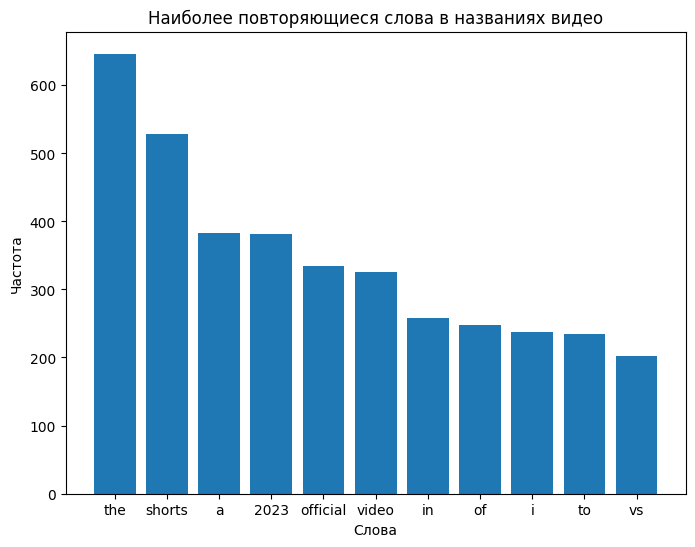

In [ ]:
d = {}

for name in df['title']:
  name = re.sub(r'[^\w\s]', '', name)
  name = name.split()
  for word in name:
    d[word.lower()] = d.get(word.lower(), 0) + 1

d_top = list(sorted(d.items(), key = lambda x: x[1], reverse=True))[:11]
top_words = [i[0] for i in d_top]
top_counts = [i[1] for i in d_top]

plt.subplots(figsize=(8, 6)) 
plt.bar(top_words, top_counts)

plt.xlabel('Слова')
plt.ylabel('Частота')
plt.title('Наиболее повторяющиеся слова в названиях видео');

Сложно дать какую-либо оценку тому, какие слова наиболее часто встречаются в названиях видео в "Трендах", поскольку артикли и предлоги не дают нам определенного представления. \
Построим новую гистограмму, но исключим по возможности предлоги и артикли:

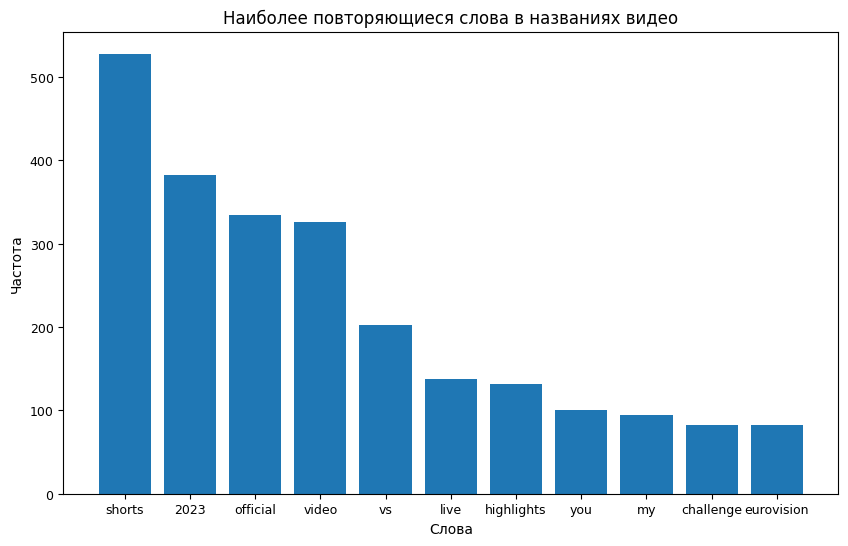

In [ ]:
d = {} 
to_skip = ['a', 'an', 'the', 'some', 'any', 'this', 'that', 'these', 'those',
          'in', 'on', 'at', 'by', 'with', 'of', 'for', 'from', 'to', 'into', 'onto', 'upon', 'over', 'under', 'between', 'among',
          'about', 'after', 'before', 'during', 'above', 'below', 'through', 'around', 'behind', 'beside', 'beyond', 'inside', 'outside',
          'near', 'far', 'off', 'out', 'up', 'down', 'throughout', 'within', 'without', 'underneath', 'along', 'across', 'against', 'towards', 
           'x', 'de', 'v', 'в', 'la', 'i', '1', '2', 'and', 'is', 'на']

for name in df['title']:
  name = re.sub(r'[^\w\s]', '', name)
  name = name.split()
  for word in name:
    word = word.lower()
    if word not in to_skip:
      d[word] = d.get(word, 0) + 1

d_top = list(sorted(d.items(), key = lambda x: x[1], reverse=True))[:11]
top_words = [i[0] for i in d_top]
top_counts = [i[1] for i in d_top]

plt.subplots(figsize=(10, 6)) 
plt.bar(top_words, top_counts)

plt.xlabel('Слова')
plt.ylabel('Частота')
plt.title('Наиболее повторяющиеся слова в названиях видео')
plt.tick_params(axis='both', which='major', labelsize = 9);

**Вывод:** \
Наиболее часто в названиях видео используются слова  "shorts", "2023", "official", "video". Специфично появление слова "eurovision" в названиях видео в "Трендах", однако эта специфика связана с периодом времени, в который мы проводили сбор данных.

Рассмотрим наиболее повторяющиеся пары в тегах к видео на момент сбора данных

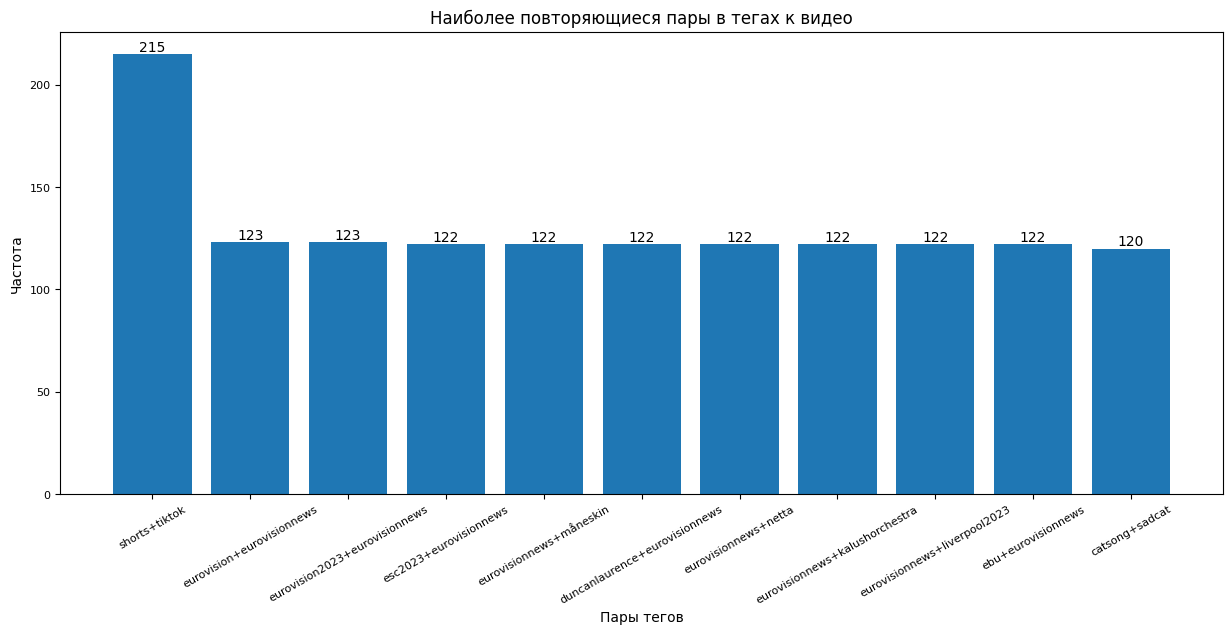

In [ ]:
d = {}
for line in df['tags']:
  line = list(map(lambda x: x.lower(), line.split('|')))
  pairs = list(combinations(line, 2))
  for pair in pairs:
    pair = sorted(pair)
    pair = pair[0].replace(' ', '') + '+' + pair[1].replace(' ', '')
    d[pair] = d.get(pair, 0) + 1

d_top = list(sorted(d.items(), key = lambda x: x[1], reverse=True))[:11]
top_pairs = [i[0] for i in d_top]
top_counts = [i[1] for i in d_top]

plt.subplots(figsize=(15, 6)) 
plt.bar(top_pairs, top_counts)

for i, v in enumerate(top_counts):
    plt.annotate(str(v), (top_pairs[i], v), ha='center', va='bottom')

plt.xlabel('Пары тегов')
plt.xticks(top_pairs, rotation=30)
plt.ylabel('Частота')
plt.title('Наиболее повторяющиеся пары в тегах к видео')
plt.tick_params(axis='both', which='major', labelsize = 8);

**Вывод:** \
Наиболее часто встречается пара тегов shorts и tiktok. Однако практически все остальные пары включают в себя слово eurovision, это, опять-таки, связано с проведением конкурса с 9 по 13 мая этого года

Теперь посмотрим на количество просмотров в зависимости от количества тегов под видео

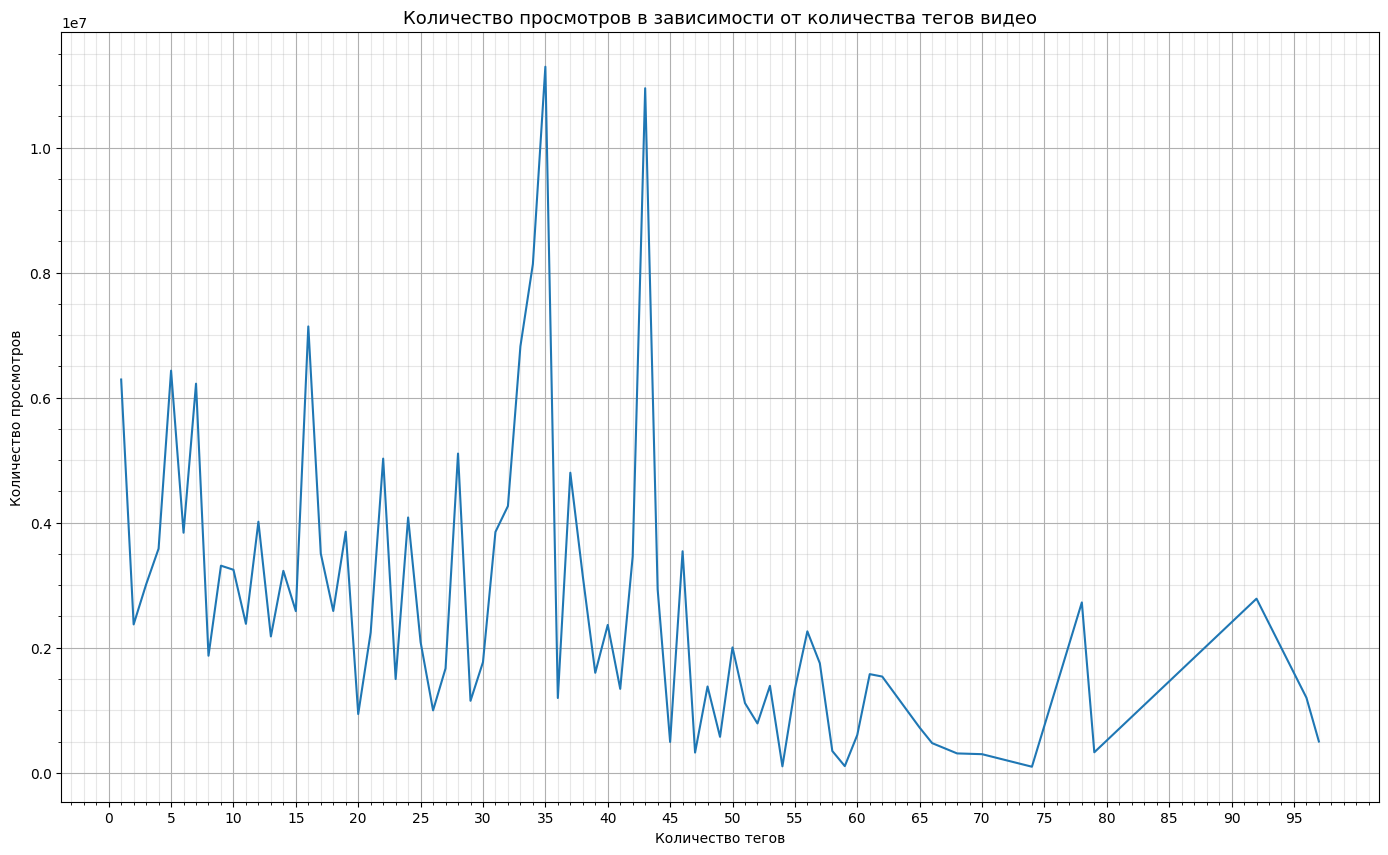

In [ ]:
view_num = df['view_count']
tag_len = list(map(lambda x: len(x), list(map(lambda x: x.split('|'), df['tags']))))
temp = pd.DataFrame({"Views": view_num, "Tags_len": tag_len})
temp = temp.groupby(['Tags_len']).agg({'Views': 'mean'})

fig, ax = plt.subplots(figsize=(17, 10)) 
ax.grid(which='both') # настройка более подробной сетки: увеличение частоты делений
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=0.3)
ax.grid(which='major', alpha=1)
ax.set_xticks(range(0, 98, 5))

plt.plot(temp['Views'])
plt.title('Количество просмотров в зависимости от количества тегов видео', fontsize = 13)
plt.xlabel('Количество тегов', fontsize = 10)
plt.ylabel('Количество просмотров', fontsize = 10);

**Вывод:** \
После проведения анализа и построения графика можно сделать предположение о том, что взаимосвязь между количеством тегов и количеством просмотров видео отсутствует. Интересны два резких подъема - при 35 и 43 тегах. Предполагаем, что это всего лишь два популярных видео, содержащие такое количество тегов.

### Часть 4 - предварительная формулировка гипотез ###

В ходе дальнейшего анализа мы бы хотели проверить следующие гипотезы:


*   **Гипотеза №1**: Наличие в тегах/ описании под видео ссылок, свидетельствующих о рекламной интеграции блогера/канала, влияет на попадение видео в "Тренды"
*   **Гипотеза №2**: Наличие в описании под видео информации о конкурсе/розыгрыше влияет на рост числа комментариев/ лайков под видео
*   **Гипотеза №N**: будут еще

